## Setup environment

To run the notebook, please create a `.env` file like the following example: 

```BASH
OPENAI_API_KEY=<your_openai_api_key>
OPENAI_MODEL=gpt-4-turbo
TAVILY_API_KEY=<your_tavily_api_key>
```

In [1]:
from dotenv import load_dotenv

load_dotenv() 


True

## Build a "normal" chatbot

In [2]:
from rigorous_llm.graph_builders import create_default_casual_chatbot_graph_builder 

basic_casual_chatbot_graph = create_default_casual_chatbot_graph_builder() 

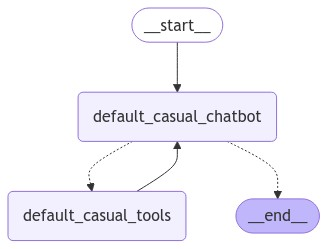

In [3]:
from IPython.display import Image, display

try:
    display(Image(basic_casual_chatbot_graph.compile().get_graph().draw_mermaid_png()))
except Exception:
    pass

## Build the rigorous LLM with the "normal" chatbot

In [4]:
from rigorous_llm.graph_builders import create_rigorous_llm_graph 

rigorous_llm_graph_builder = create_rigorous_llm_graph(
    chatbot_subgraph=basic_casual_chatbot_graph
)

rigorous_llm = rigorous_llm_graph_builder.compile() 

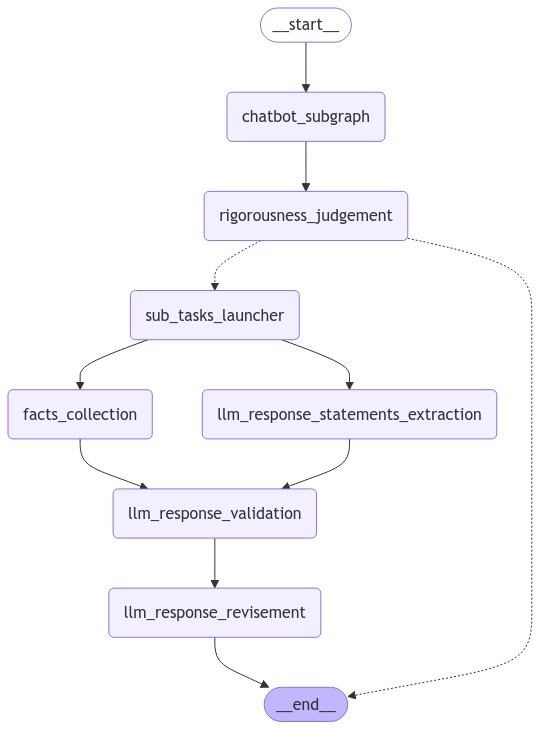

In [5]:
from IPython.display import Image, display

try:
    img = Image(rigorous_llm.get_graph().draw_mermaid_png())
    display(img)
except Exception:
    pass

## Test-drive rigorous LLM

In [8]:
def stream_graph_updates(user_input: str):
    for event in rigorous_llm.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            # print("Event", value)
            if ("messages" in value): 
                print("Assistant:", value["messages"][-1].content)

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    stream_graph_updates(user_input)

    # Just accept one request for now 
    break 

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Assistant: Wei-Fan Chiang is a researcher affiliated with the University of Utah. He has been cited in various publications and has won the prestigious NVIDIA Graduate Fellowship. Wei-Fan Chiang is associated with the School of Computing at the University of Utah and has been recognized for his work in GPU computing research. You can find more information about him on his [ResearchGate profile](https://www.researchgate.net/profile/Wei-Fan-Chiang).


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Judgement of the need of rigorousness: True
INFO:root:Extracting facts from tool messages: d67f7626-25f6-48a9-a1b0-197e81abc9ee
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:6 statements extracted from the last AI message
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:1 new facts extracted
INFO:root:Validating 6 extracted statements against 9 facts
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "H

Assistant: Wei-Fan Chiang is a researcher affiliated with the University of Utah, associated with the School of Computing. He has been cited in various publications, won the prestigious NVIDIA Graduate Fellowship, and recognized for his work in GPU computing research. More information about Wei-Fan Chiang can be found on his ResearchGate profile.
